In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")
import glob
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.tseries.offsets import DateOffset
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
import random

E:\DS-670 Capstone Project\Capstone\Concate_files\East_virginia_Richmond_concat.csv
E:\DS-670 Capstone Project\Capstone\Concate_files\North_New Jersey_Trenton_concat.csv
E:\DS-670 Capstone Project\Capstone\Concate_files\South_texas_Austin_concat.csv
E:\DS-670 Capstone Project\Capstone\Concate_files\West_California_Sacramento_concat.csv


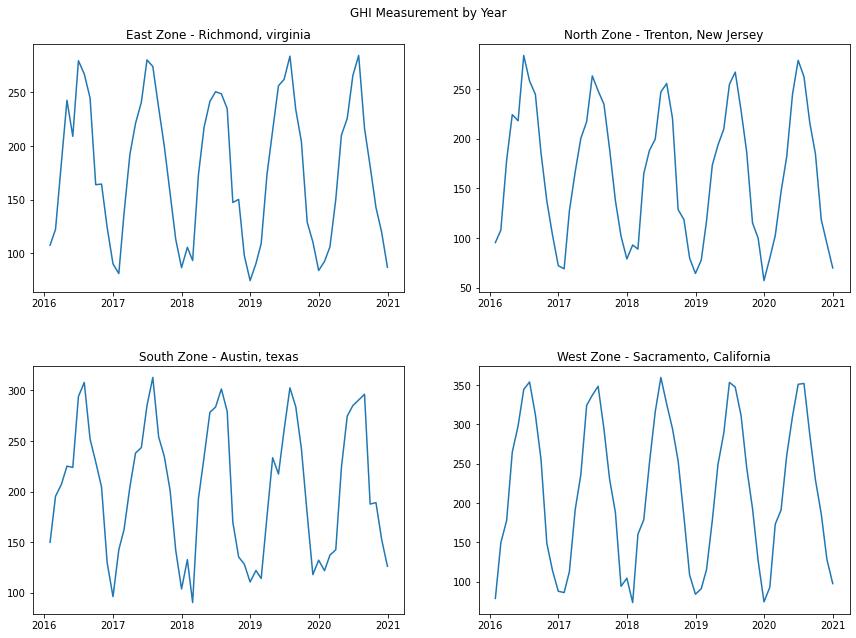

In [3]:
#All Region CSV Files
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
# Read Files
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    # Drop Nan Columns
    data.dropna(axis=1,inplace=True)
    # Covert into date_time format 
    data['Date'] = pd.to_datetime(data[['Year','Month','Day','Hour','Minute']],format='%Y/%M/%D %H%m')
    # We will make a predeiction on GHI.
    data = data[['Date','GHI']]
    data.set_index('Date',inplace=True)
    #Resampling generates a unique sampling distribution on the basis of the actual data.
    #'M' = month end frequency
    data = data.resample('M').mean()
    row, col = divmod(i, 2)
    axs[row, col].plot(data['GHI'])
    axs[row, col].set_title(region)

# set the overall title for the figure
fig.suptitle('GHI Measurement by Year')
# adjust the spacing between the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.3)
# show the plot
plt.savefig('GHI Measurement by Each Year.png')
plt.show()

ADA Fullar Test Of GHI: East Zone - Richmond, virginia 
------------------------------------------------------------
ADF Test Statistic : -8.85684820602518
p-value : 1.5197640264267964e-14
#Lags Used : 5
Number of Observations Used : 54
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 


ADA Fullar Test After Doing the 12 Shifting: East Zone - Richmond, virginia 
------------------------------------------------------------------------------
ADF Test Statistic : -3.8558553955184096
p-value : 0.002384846875334316
#Lags Used : 8
Number of Observations Used : 39
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary 


ADA Fullar Test Of GHI: North Zone - Trenton, New Jersey 
------------------------------------------------------------
ADF Test Statistic : -1.7273612226132509
p-value : 0.41707313264783885
#Lags Used : 11
Number of Observations Used : 48
weakevid

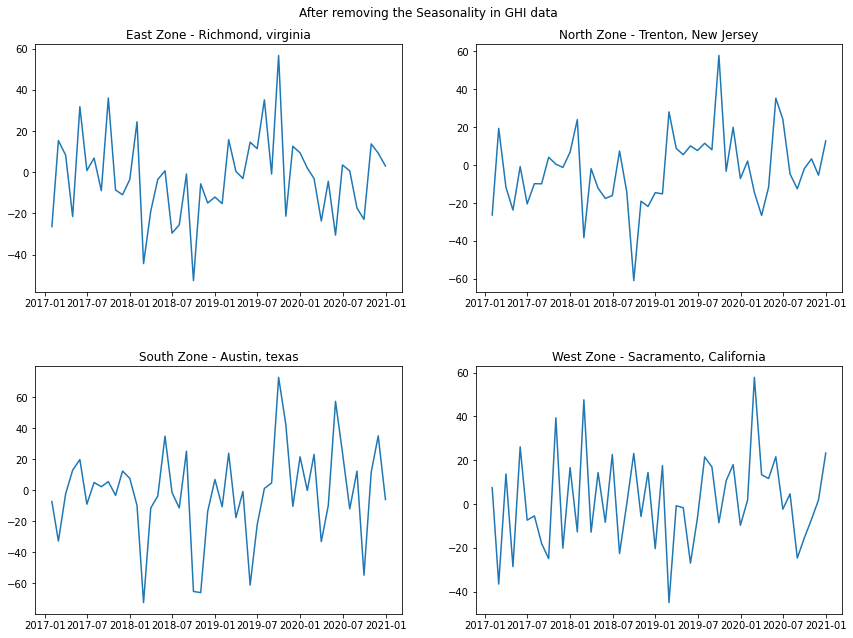

In [363]:
csv_files = glob.glob(os.path.join(path, "*.csv"))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
# Read Files
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    # Drop Nan Columns
    data.dropna(axis=1,inplace=True)
    # Covert into date_time format 
    data['Date'] = pd.to_datetime(data[['Year','Month','Day','Hour','Minute']],format='%Y/%M/%D %H%m')
    # We will make a predeiction on GHI.
    data = data[['Date','GHI']]
    data.set_index('Date',inplace=True)
    #Resampling generates a unique sampling distribution on the basis of the actual data.
    #'M' = month end frequency
    data = data.resample('M').mean()
    #ADF Test is a common statistical test used to test whether a given Time series is stationary or not . 
    #Testing for Stationarity
    test_result=adfuller(data)
    #Ho: It is non stationary
    #H1: It is stationary
    def adfuller_test(GHI):
        result=adfuller(GHI)
        #adfuller gives 5 different values.
        labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
        for value,label in zip(result,labels):
            print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("\033[31m\033[1mstrong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary \033[0m")
        else:
            print("\033[32m\033[1mweakevidence against null hypothesis, time series has a unit root, indicating it is non-stationary\033[0m")
    print("\033[1mADA Fullar Test Of GHI:", region,"\033[0m")
    print("------------------------------------------------------------")
    adfuller_test(data['GHI'])
    print("\n")
    
    data['GHI First Difference'] = data['GHI'] - data['GHI'].shift(1)
    data['Seasonal First Difference']= data['GHI'] - data['GHI'].shift(12)
    ## Again test dickey fuller test
    print("\033[1mADA Fullar Test After Doing the 12 Shifting:", region,"\033[0m")
    print("------------------------------------------------------------------------------")
    adfuller_test(data['Seasonal First Difference'].dropna())
    print("\n")
    row, col = divmod(i, 2)
    axs[row, col].plot(data['Seasonal First Difference'])
    axs[row, col].set_title(region)

# set the overall title for the figure
fig.suptitle('After removing the Seasonality in GHI data')
# adjust the spacing between the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.3)
# show the plot
plt.savefig('After removing the Seasonality in GHI data.png')
plt.show()

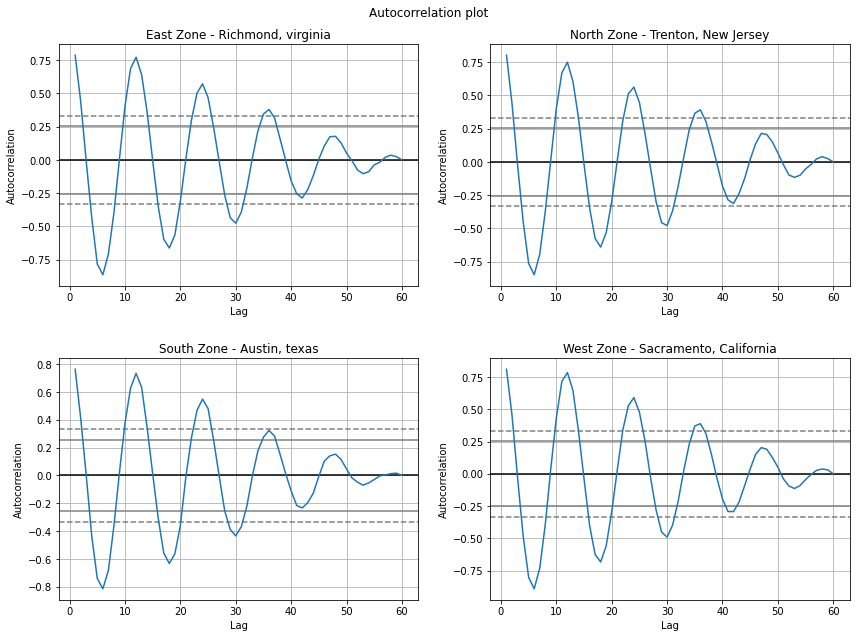

In [4]:
csv_files = glob.glob(os.path.join(path, "*.csv"))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
# Read Files
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    # Drop Nan Columns
    data.dropna(axis=1,inplace=True)
    # Covert into date_time format 
    data['Date'] = pd.to_datetime(data[['Year','Month','Day','Hour','Minute']],format='%Y/%M/%D %H%m')
    # We will make a predeiction on GHI.
    data = data[['Date','GHI']]
    data.set_index('Date',inplace=True)
    #Resampling generates a unique sampling distribution on the basis of the actual data.
    #'M' = month end frequency
    data = data.resample('M').mean()
    #ADF Test is a common statistical test used to test whether a given Time series is stationary or not . 
    #Testing for Stationarity
    row, col = divmod(i, 2)
    autocorrelation_plot(data['GHI'], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(region)


# set the overall title for the figure
fig.suptitle('Autocorrelation plot')
# adjust the spacing between the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.3)
# show the plot
plt.savefig('Autocorrelation Plot.png')
plt.show()

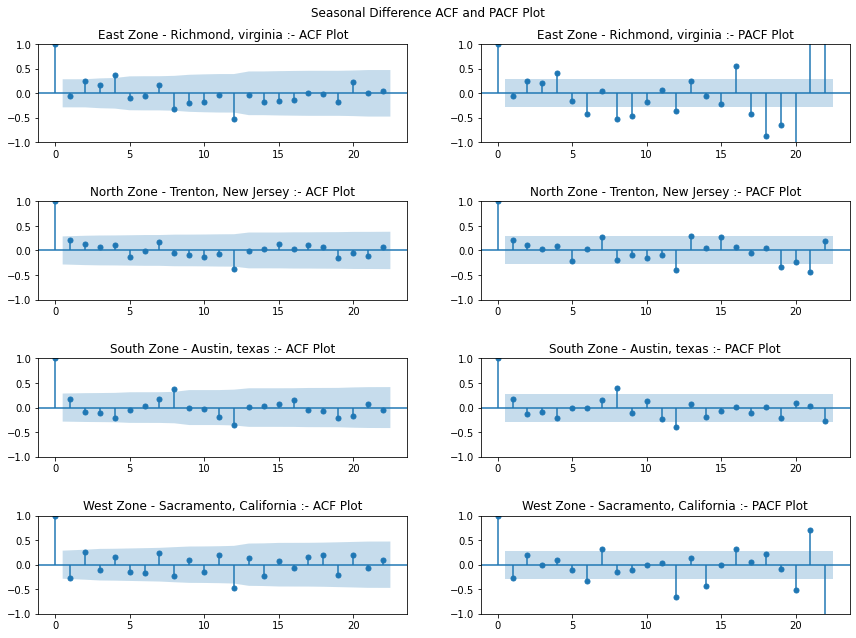

In [5]:
csv_files = glob.glob(os.path.join(path, "*.csv"))
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 9))
# Read Files
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    # Drop Nan Columns
    data.dropna(axis=1,inplace=True)
    # Covert into date_time format 
    data['Date'] = pd.to_datetime(data[['Year','Month','Day','Hour','Minute']],format='%Y/%M/%D %H%m')
    # We will make a predeiction on GHI.
    data = data[['Date','GHI']]
    data.set_index('Date',inplace=True)
    #Resampling generates a unique sampling distribution on the basis of the actual data.
    #'M' = month end frequency
    data = data.resample('M').mean()
    #ADF Test is a common statistical test used to test whether a given Time series is stationary or not . 
    #Testing for Stationarity
    test_result=adfuller(data)
    #Ho: It is non stationary
    #H1: It is stationary
    data['GHI First Difference'] = data['GHI'] - data['GHI'].shift(1)
    data['Seasonal First Difference']= data['GHI'] - data['GHI'].shift(12)
    ## Again test dickey fuller test
    sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=22, ax=axs[i, 0])
    axs[i, 0].set_title(region+" :- ACF Plot")
    sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=22, ax=axs[i, 1])
    axs[i, 1].set_title(region+" :- PACF Plot")
    

# set the overall title for the figure
fig.suptitle('Seasonal Difference ACF and PACF Plot')
# adjust the spacing between the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.6)
# show the plot
plt.savefig('ACF & PACF Plot.png')
plt.show()

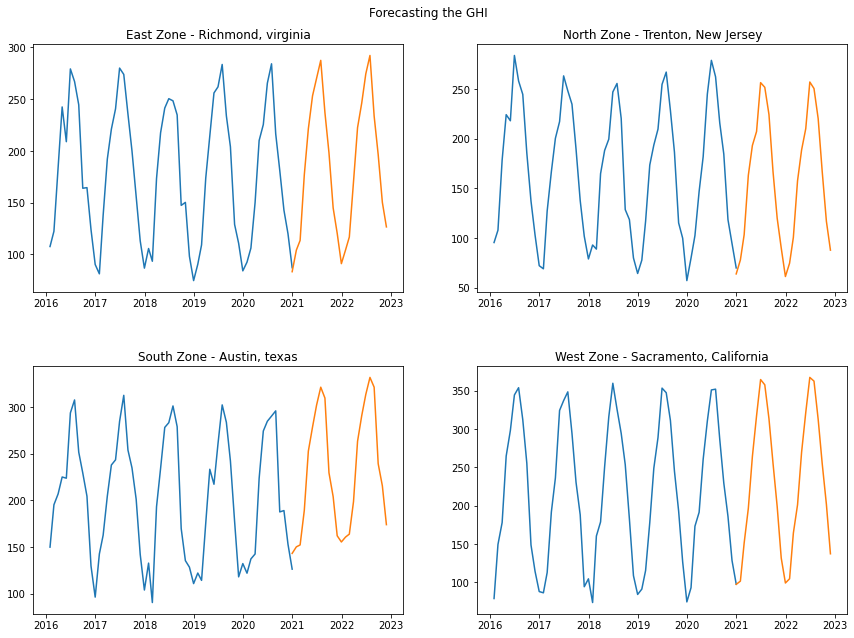

In [373]:
csv_files = glob.glob(os.path.join(path, "*.csv"))
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
# Read Files
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    # Drop Nan Columns
    data.dropna(axis=1,inplace=True)
    # Covert into date_time format 
    data['Date'] = pd.to_datetime(data[['Year','Month','Day','Hour','Minute']],format='%Y/%M/%D %H%m')
    # We will make a predeiction on GHI.
    data = data[['Date','GHI']]
    data.set_index('Date',inplace=True)
    #Resampling generates a unique sampling distribution on the basis of the actual data.
    #'M' = month end frequency
    data = data.resample('M').mean()
    #ADF Test is a common statistical test used to test whether a given Time series is stationary or not . 
    #Testing for Stationarit
    
    model=sm.tsa.statespace.SARIMAX(data['GHI'],order=(1, 1, 0),seasonal_order=(1,1,1,12))
    results=model.fit()
    #Predict the data between 2019-12-31 to 2020-12-31
    data['forecast']=results.predict(start='2019-12-31',end='2021-12-31',dynamic=True)
    future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]
    future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
    future_data=pd.concat([data,future_datest_data])
    future_data['forecast'] = results.predict(start = '2020-12-31', end = '2022-12-31', dynamic= True)  
    #future_data[['GHI', 'forecast']].plot(figsize=(12, 8)) 
    row, col = divmod(i, 2)
    axs[row, col].plot(future_data[['GHI', 'forecast']])
    axs[row, col].set_title(region)

# set the overall title for the figure
fig.suptitle('Forecasting the GHI')
# adjust the spacing between the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.3)
# show the plot
plt.savefig('Forecasting the GHI.png')
plt.show()

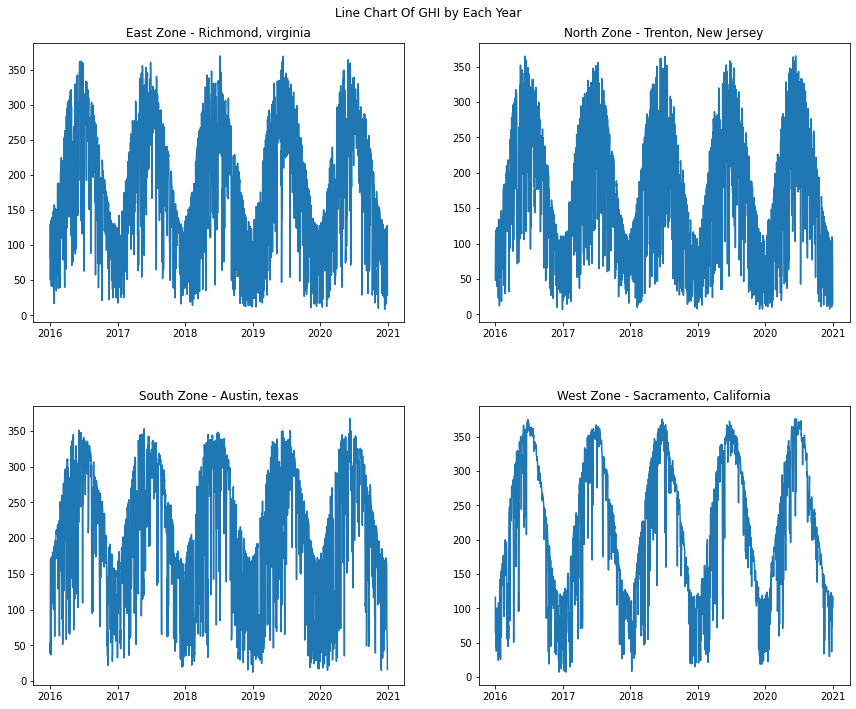

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    ax = axes[i]
    ax.plot(data['Date'], data['GHI'])
    ax.set_title(region)
fig.suptitle('Line Chart Of GHI by Each Year')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.3)
plt.savefig('Linechart of GHI by Each Year')
plt.show()



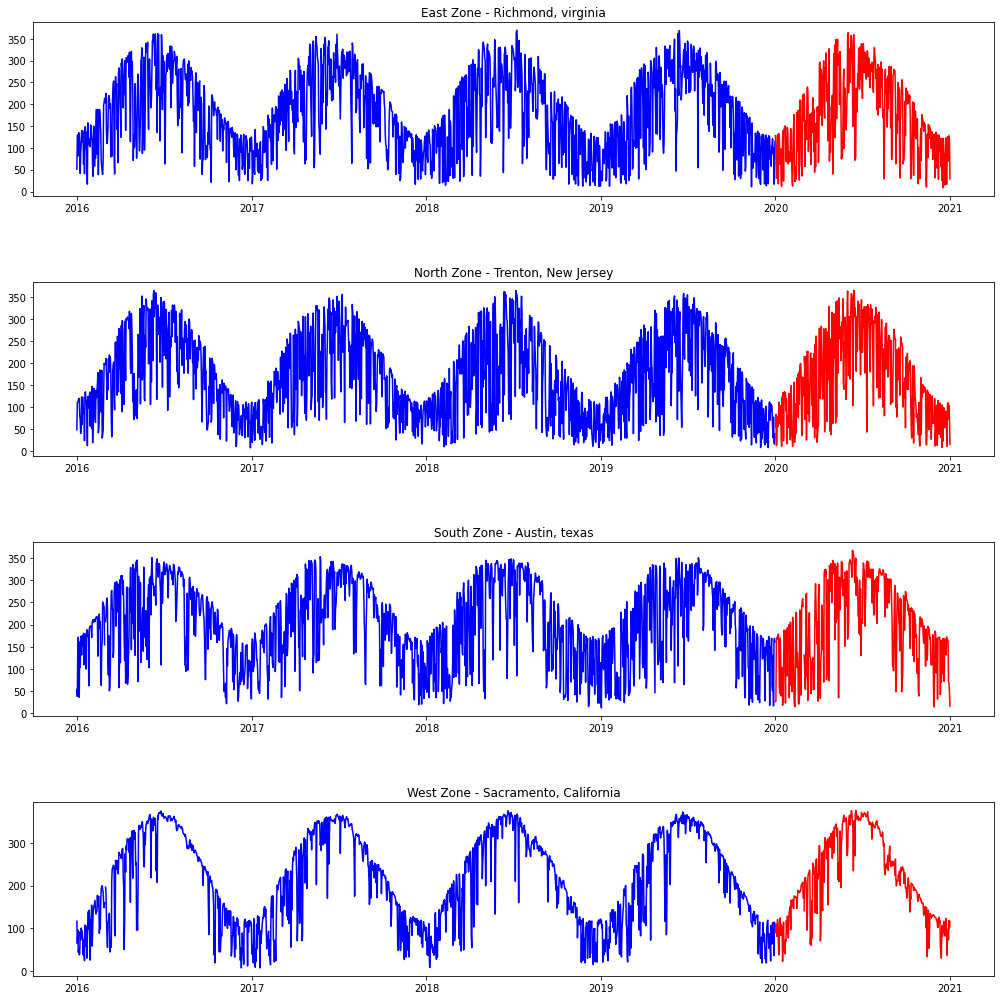

In [8]:
f, axes = plt.subplots(4, 1, figsize=(14,14))
axes = axes.flatten()
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    ax = axes[i//1]
    ax.plot(X_tr['ds'], X_tr['y'], color='blue', label='Train')
    ax.plot(X_tst['ds'], X_tst['y'], color='red', label='Test')
    ax.set_title(region)
fig.suptitle('Train and Test Data')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Without doing Resampling generates a unique sampling distribution on the basis of the actual data.png')
plt.show()


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


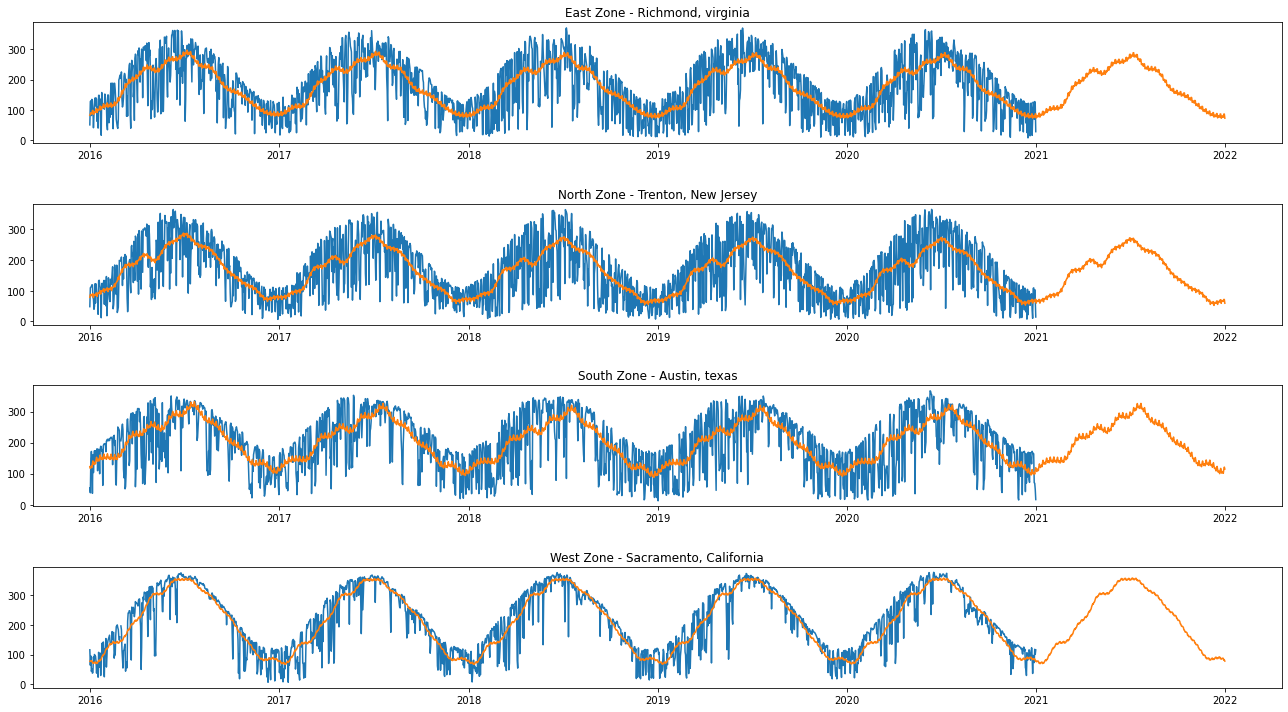

In [9]:
f, axes = plt.subplots(4, 1, figsize=(18,10))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    forecast.to_csv(region+".csv",index=False)
    # Plot the weekly patterns
    ax = axes[i//1]
    ax.plot(data['ds'], data['y'], label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], label='Forecast')
    ax.set_title(region)
fig.suptitle('Actual VS Forecast GHI Value')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Actual VS predictable data.png')
plt.show()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


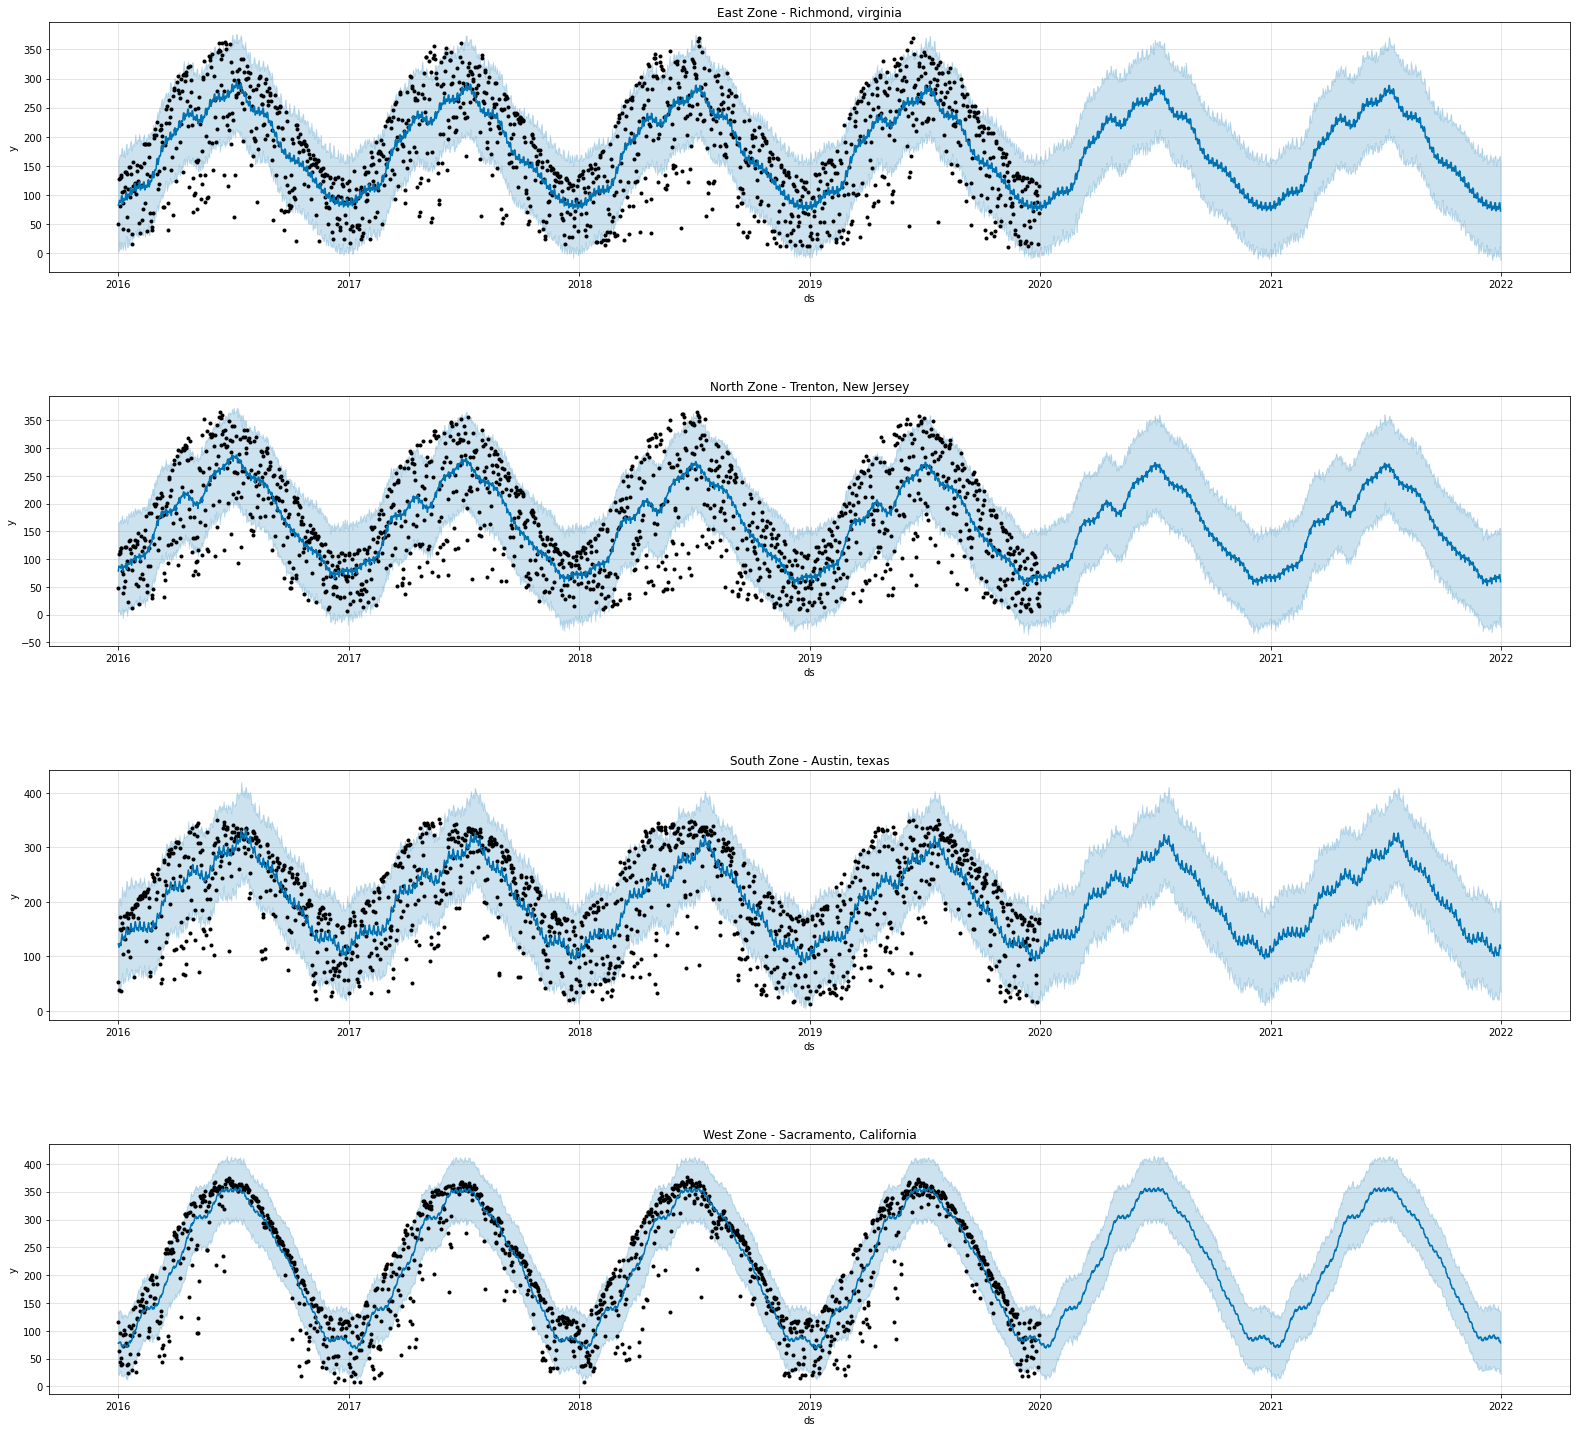

In [25]:
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    forecast.to_csv(write_csv+"Without Using Hyper parameter on Train Data"+region+'.csv',index=False)
    ax = axes[i//1]
    model.plot(forecast,ax=ax)
    ax.set_title(region)
fig.suptitle('Forecast GHI Value')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Forecast GHI Value.png')
plt.show()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


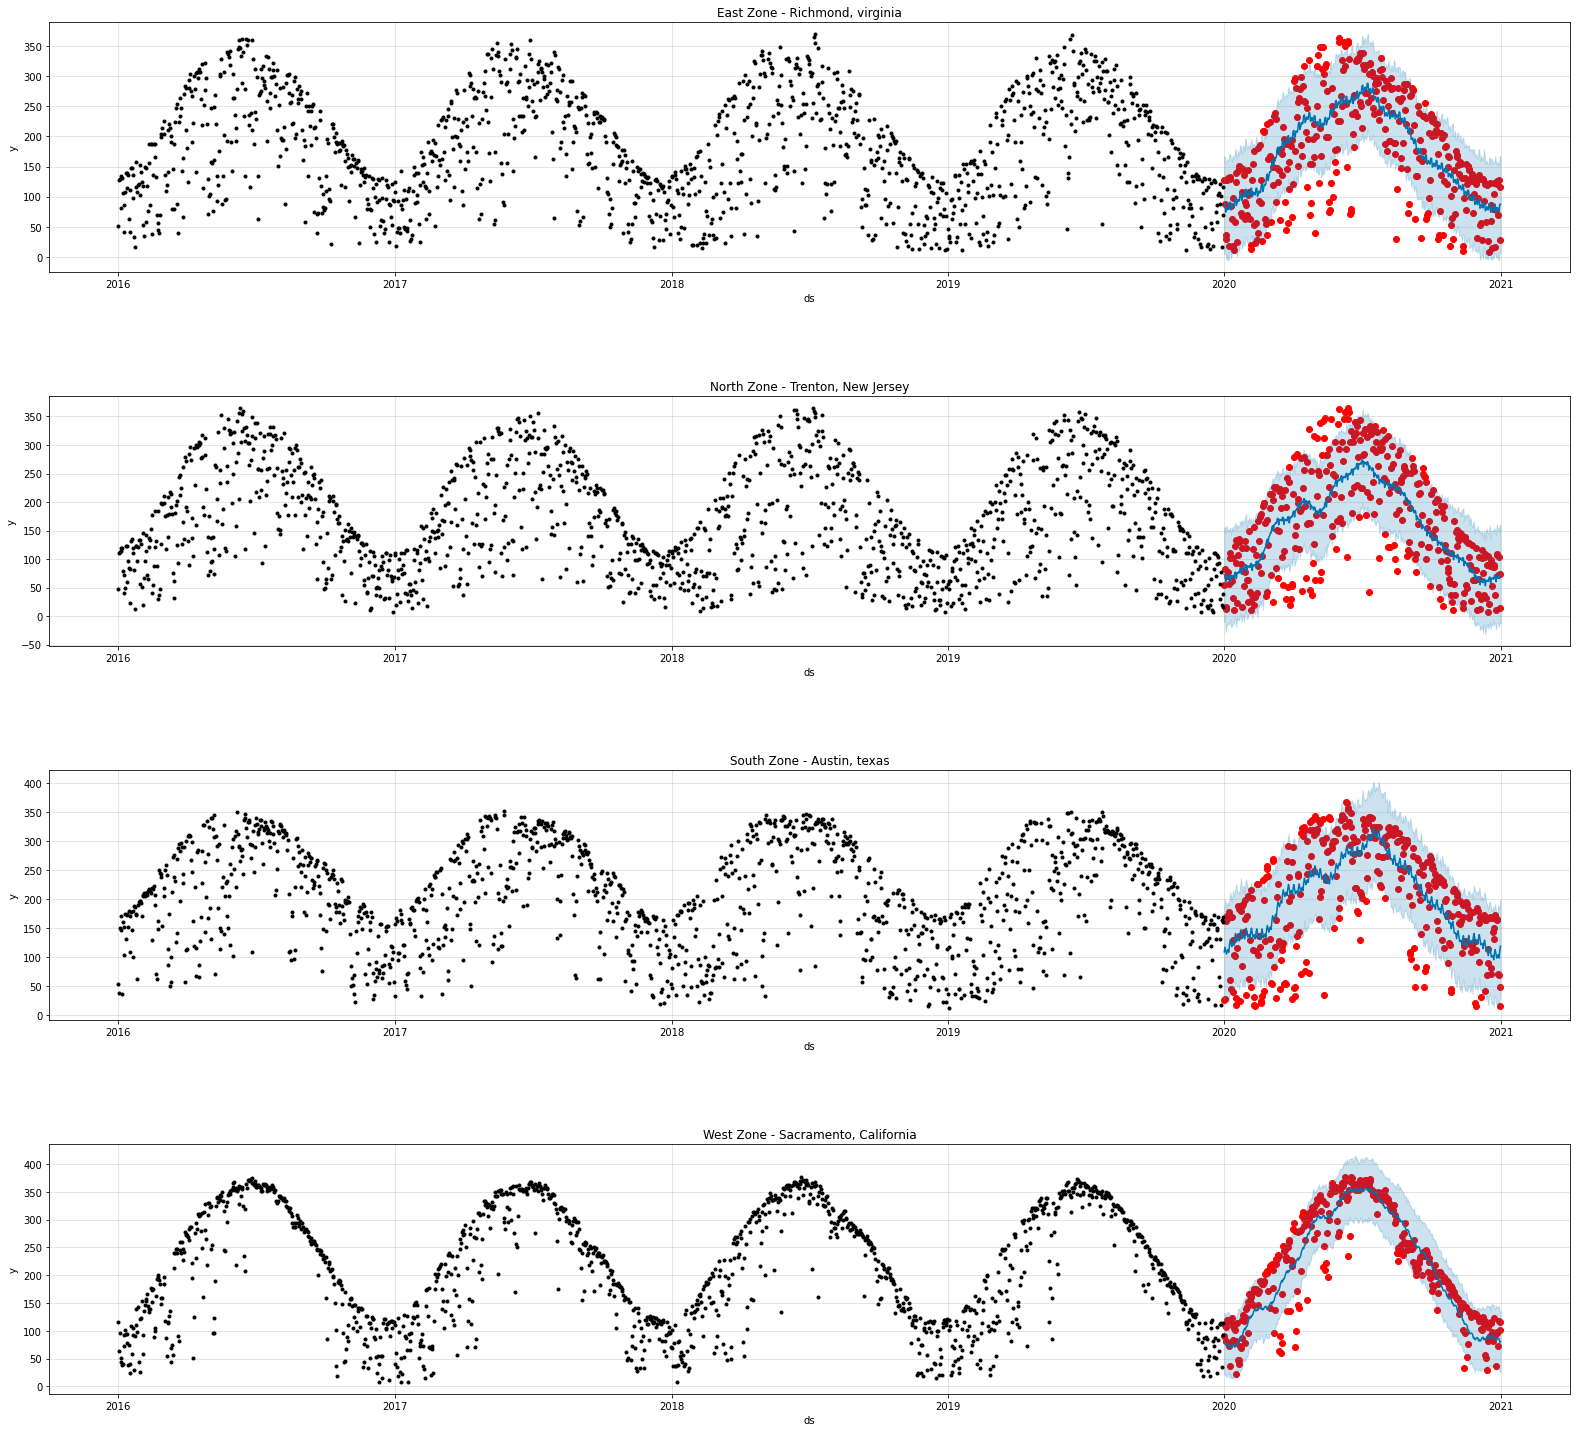

In [10]:
write_csv = 'E:/DS-670 Capstone Project/Capstone/Output result/'
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    ax = axes[i//1]
    ax.scatter(X_tst.ds, X_tst['y'], color='r')
    model.plot(X_tst_forecast, ax=ax)
    ax.set_title(region)
fig.suptitle('Plot the forecast with the Actuals GHI Value')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Plot the forecast with the Actuals GHI Value.png')
plt.show()


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


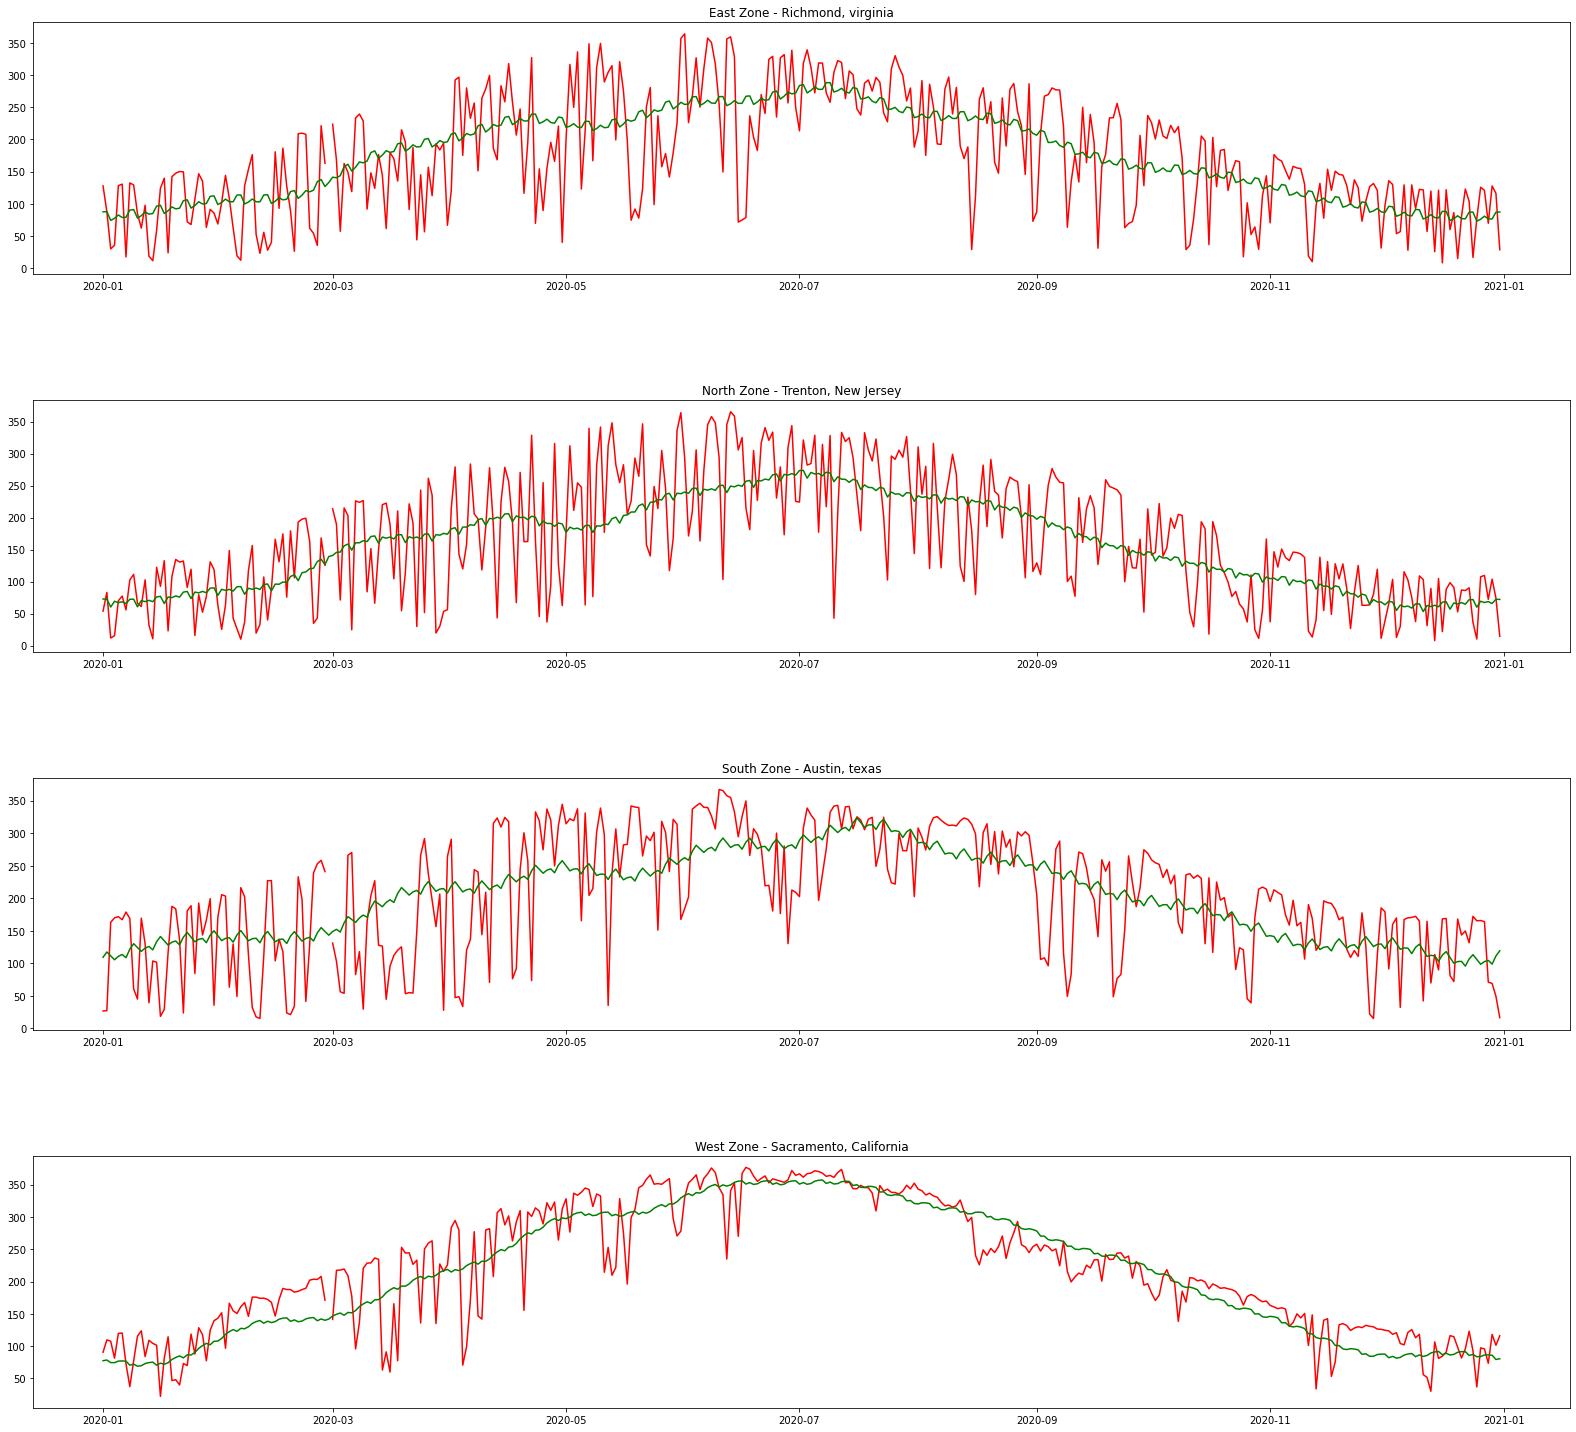

In [26]:
write_csv = 'E:/DS-670 Capstone Project/Capstone/Output result/'
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast.to_csv(write_csv+"Without Using Hyper parameter on TestData"+region+'.csv',index=False)
    ax = axes[i//1]
    ax.plot(X_tst['ds'], X_tst['y'], color='red', label='Test')
    ax.plot(X_tst_forecast['ds'],X_tst_forecast['yhat'], color='green',label='Forecast')
    ax.set_title(region)
fig.suptitle('Test Forecast vs Actuals')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Test Forecast vs Actuals.png')
plt.show()


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


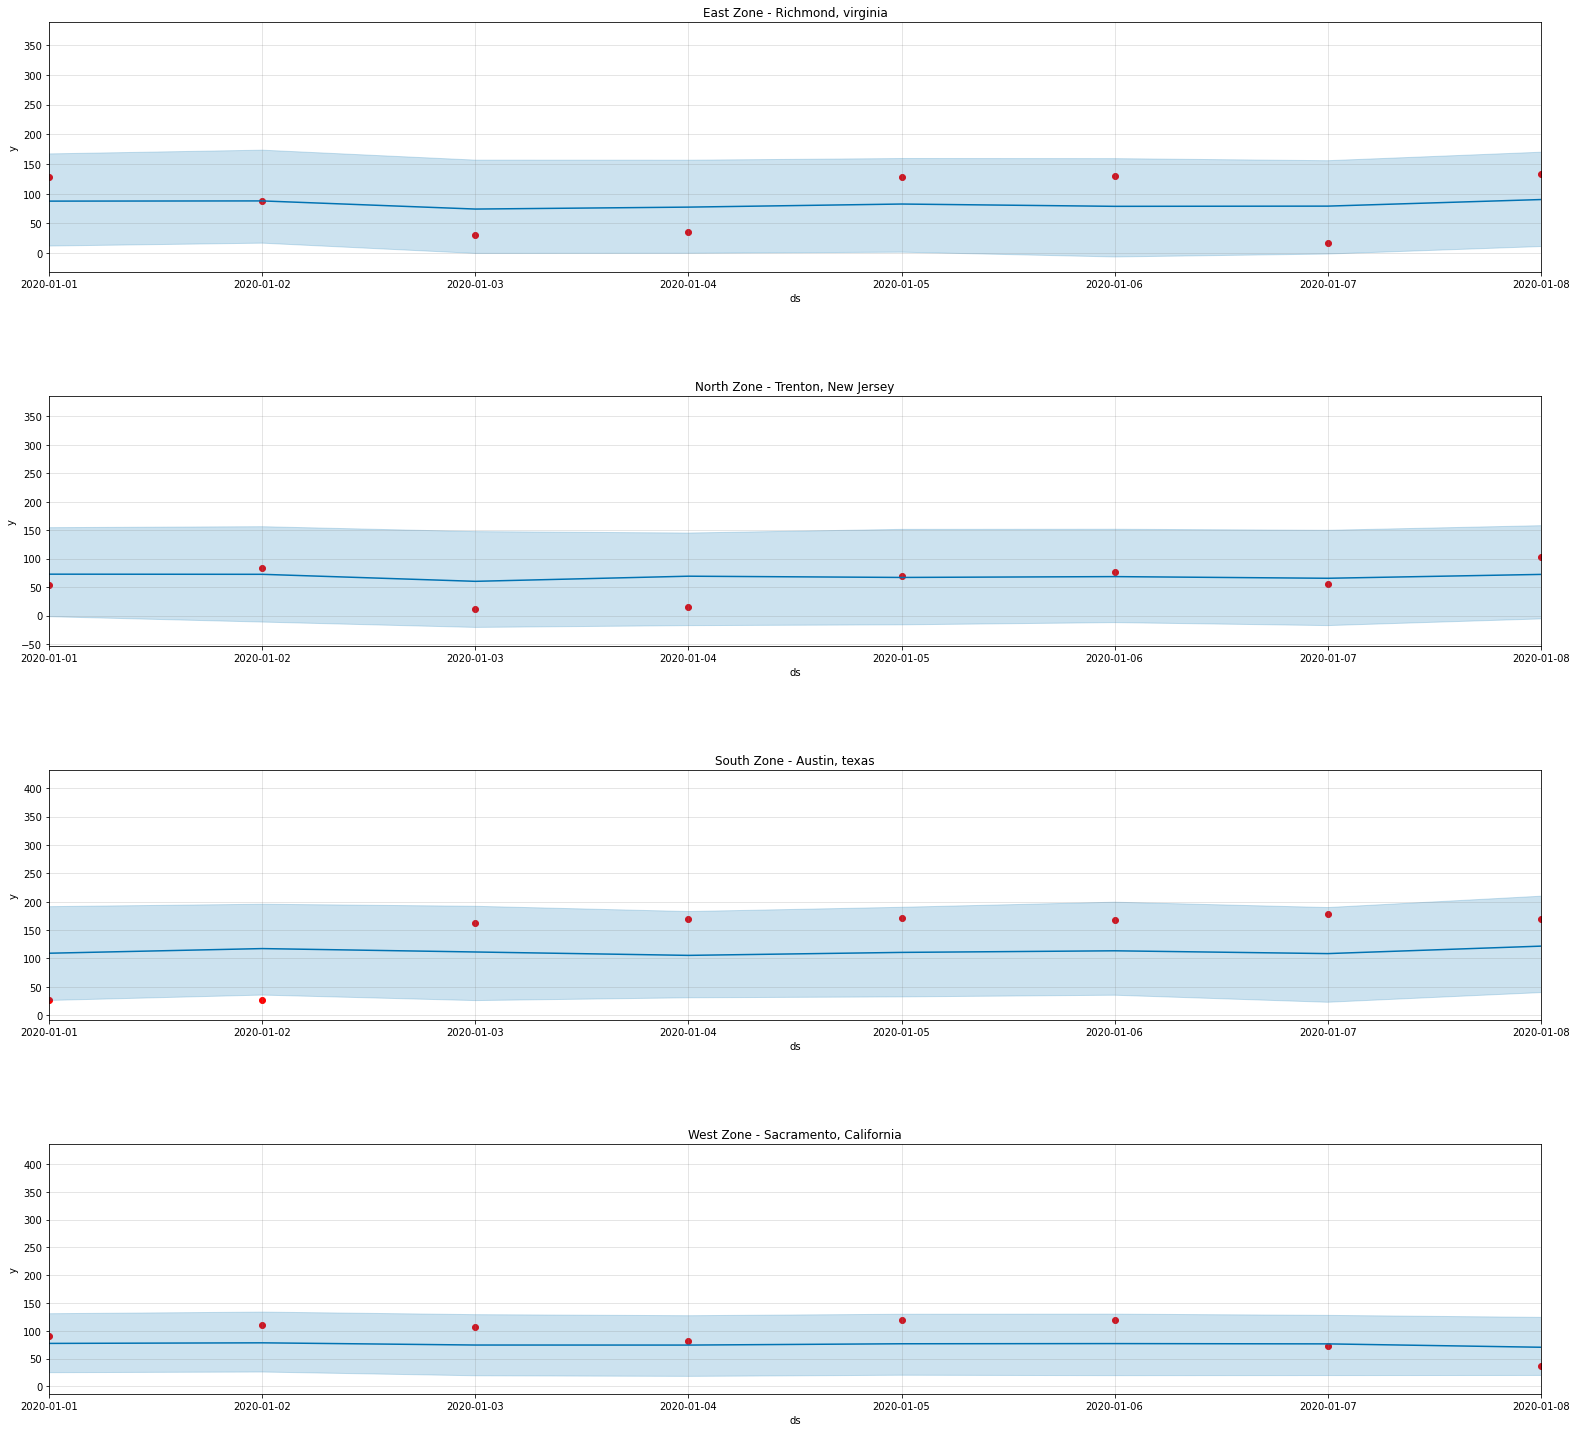

In [11]:
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    ax = axes[i//1]
    ax.scatter(X_tst['ds'], X_tst['y'], color='r')
    model.plot(X_tst_forecast, ax=ax)
    ax.set_xbound(lower='2020-01-01', upper='2020-01-08')
    ax.set_title(region)
    fig.suptitle('First Week of January Forecast vs Actuals')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('First Week of January Forecast vs Actuals.png')
plt.show()


In [265]:
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
    print("MAPE",round(mape,4))


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


MAPE nan


INFO:cmdstanpy:finish chain 1


MAPE nan


# HyperParameter Tuning using ParameterGrid

In [12]:
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 30


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

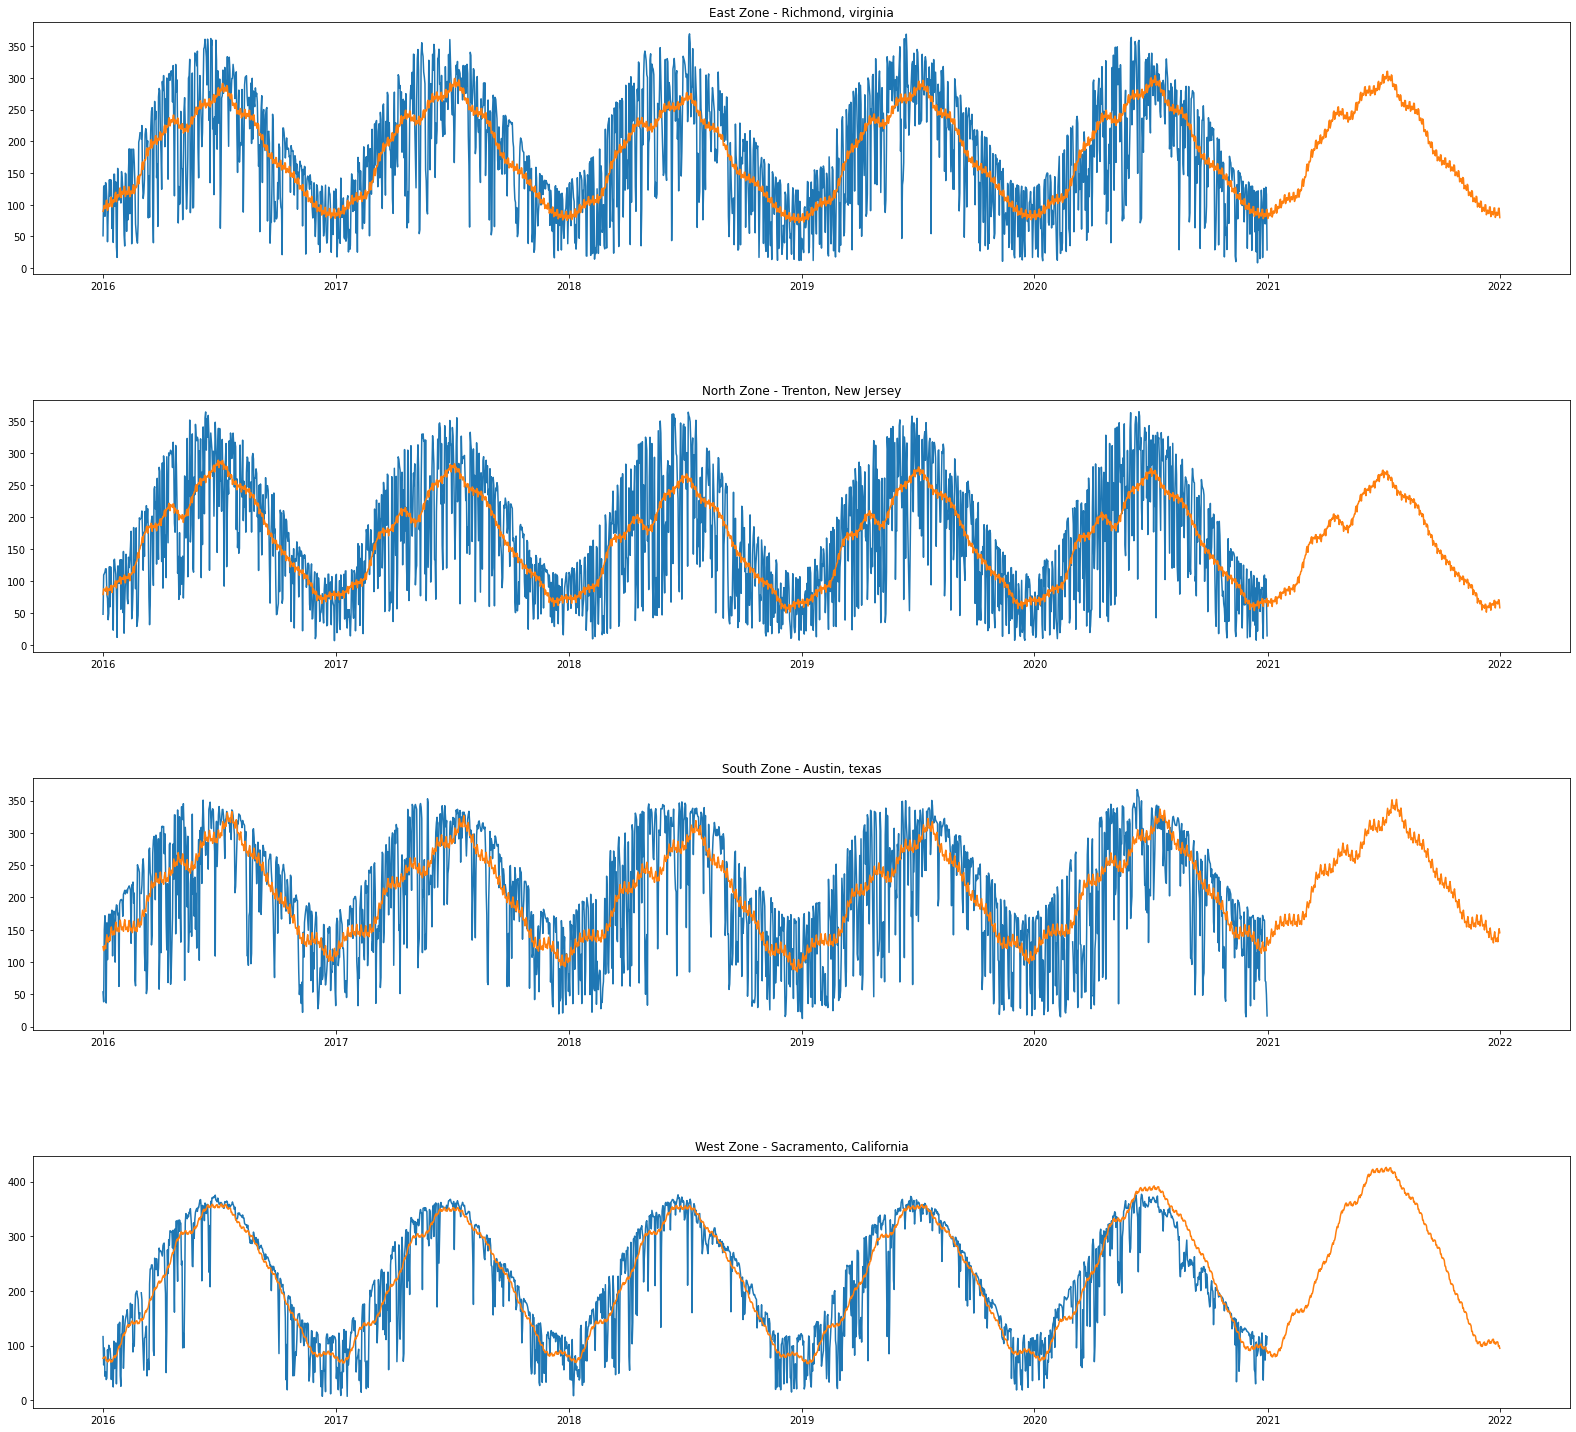

In [24]:
write_csv = 'E:/DS-670 Capstone Project/Capstone/Output result/'
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
    print("MAPE",round(mape,4))
    strt='2019-12-31'
    end='2020-02-26'
    model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
    for p in grid:
        test = pd.DataFrame()
        random.seed(0)
        train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                             n_changepoints = p['n_changepoints'],
                             seasonality_mode = p['seasonality_mode'],
                             weekly_seasonality=True,
                             daily_seasonality = True,
                             yearly_seasonality = True,
                             interval_width=0.95)
        train_model.fit(X_tr)
        train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
        train_forecast = train_model.predict(train_forecast)
        test=train_forecast[['ds','yhat']]
        Actual = data[(data['ds']>strt) & (data['ds']<=end)]
        MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
        #print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
        model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)
        parameters = model_parameters.sort_values(by=['MAPE'])
        parameters = parameters.reset_index(drop=True)
    parameters['Parameters'][0]
    dict_east = {'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
    dict_north = {'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
    dict_south = {'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
    dict_west = {'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
    if (parameters['Parameters'][0] == dict_east):
        final_model = Prophet(changepoint_prior_scale= 0.5, n_changepoints = 150, seasonality_mode = 'multiplicative', weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_north):
        final_model = Prophet(changepoint_prior_scale= 0.5,n_changepoints = 200, seasonality_mode = 'additive',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_south):
        final_model = Prophet(changepoint_prior_scale= 0.1,n_changepoints = 100,seasonality_mode = 'additive',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_west):
        final_model = Prophet(changepoint_prior_scale= 0.4,n_changepoints = 200,seasonality_mode = 'multiplicative',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    else:
        print("False")
    future = final_model.make_future_dataframe(periods=731, freq='D')
    forecast = final_model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5)
    forecast.to_csv(write_csv+ region+".csv",index=False)
    # Plot the weekly patterns
    ax = axes[i//1]
    ax.plot(data['ds'], data['y'], label='Actual')
    ax.plot(forecast['ds'], forecast['yhat'], label='Forecast')
    ax.set_title(region)
fig.suptitle('Actual VS Forecast GHI Value')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Actual VS predictable data Final Output.png')
plt.show()


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

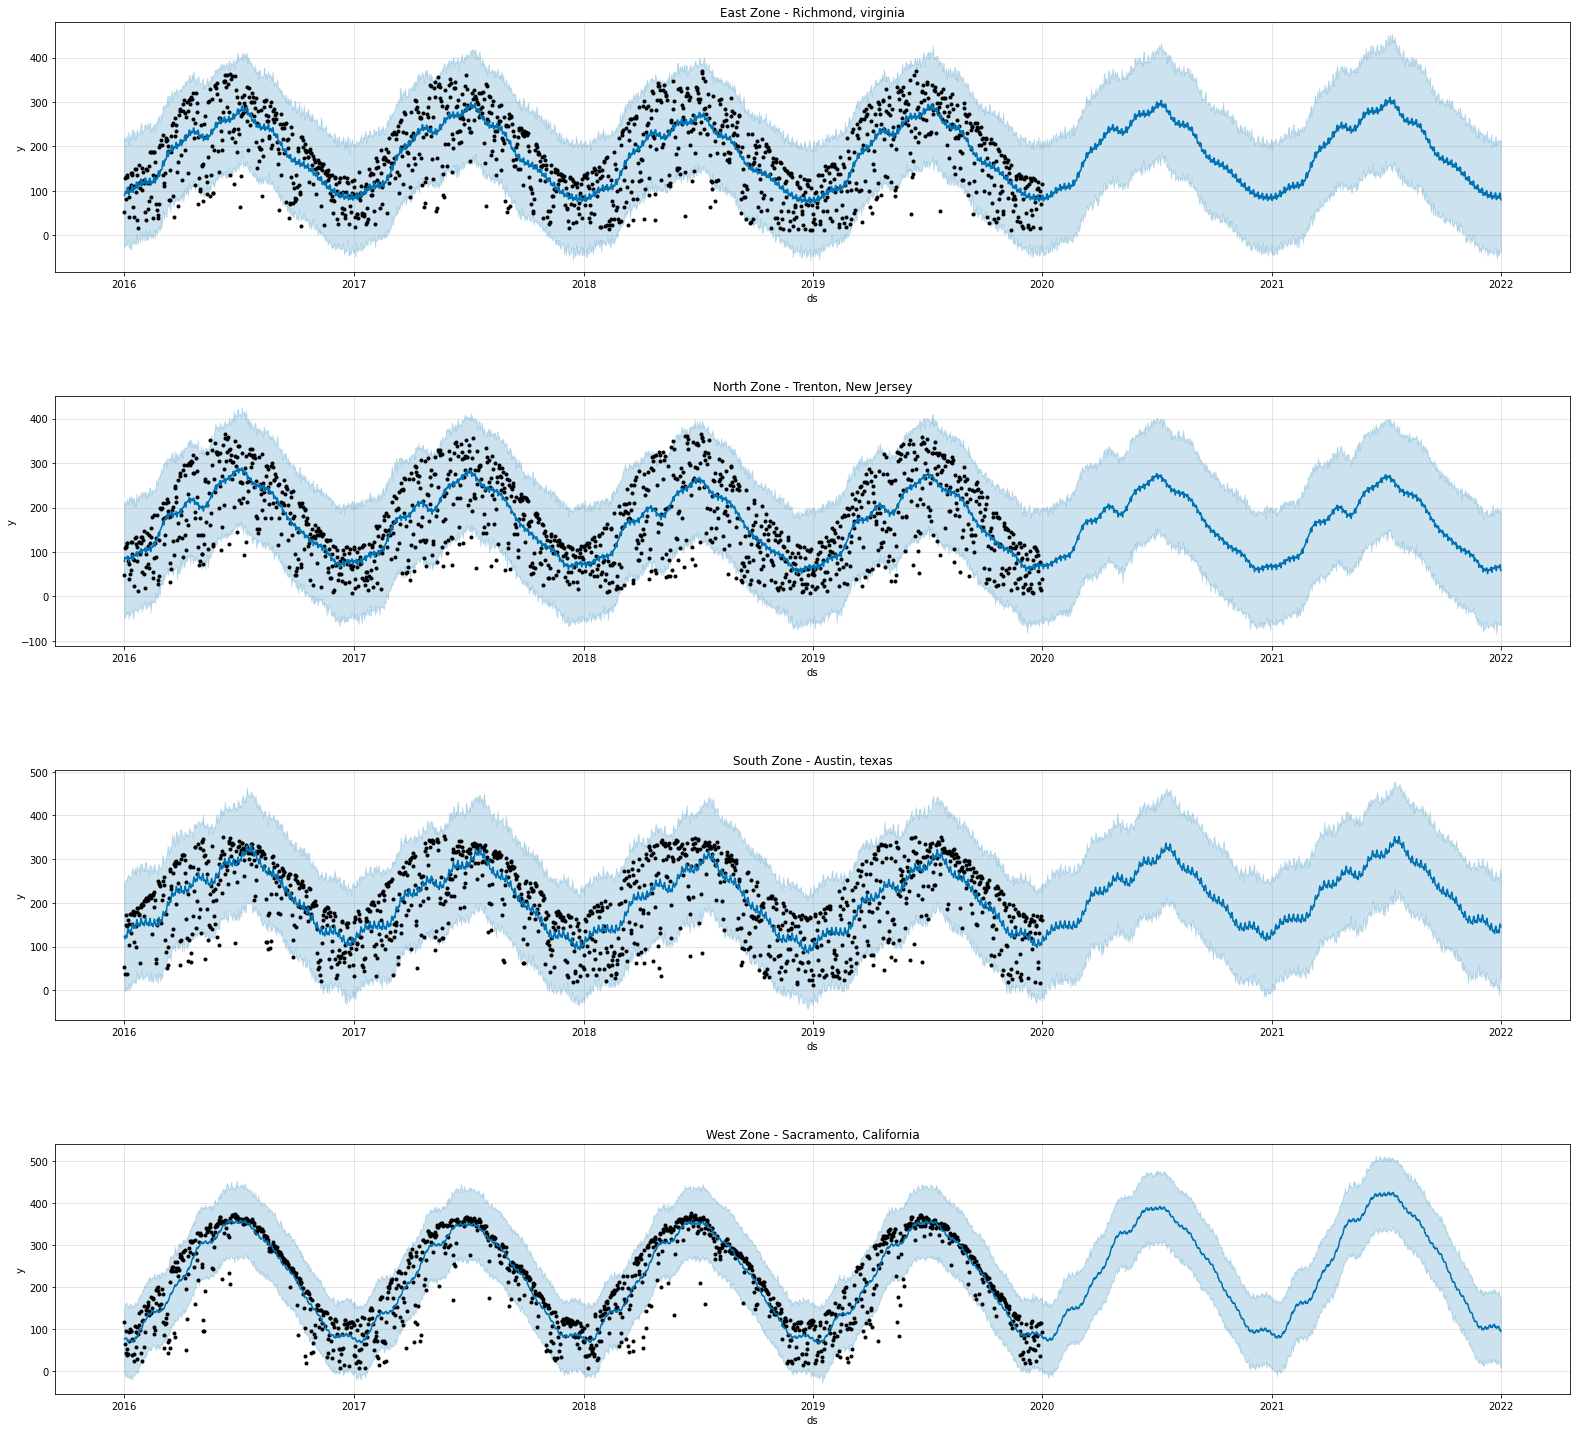

In [27]:
write_csv = 'E:/DS-670 Capstone Project/Capstone/Output result/'
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
    print("MAPE",round(mape,4))
    strt='2019-12-31'
    end='2020-02-26'
    model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
    for p in grid:
        test = pd.DataFrame()
        random.seed(0)
        train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                             n_changepoints = p['n_changepoints'],
                             seasonality_mode = p['seasonality_mode'],
                             weekly_seasonality=True,
                             daily_seasonality = True,
                             yearly_seasonality = True,
                             interval_width=0.95)
        train_model.fit(X_tr)
        train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
        train_forecast = train_model.predict(train_forecast)
        test=train_forecast[['ds','yhat']]
        Actual = data[(data['ds']>strt) & (data['ds']<=end)]
        MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
        #print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
        model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)
        parameters = model_parameters.sort_values(by=['MAPE'])
        parameters = parameters.reset_index(drop=True)
    parameters['Parameters'][0]
    dict_east = {'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
    dict_north = {'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
    dict_south = {'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
    dict_west = {'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
    if (parameters['Parameters'][0] == dict_east):
        final_model = Prophet(changepoint_prior_scale= 0.5, n_changepoints = 150, seasonality_mode = 'multiplicative', weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_north):
        final_model = Prophet(changepoint_prior_scale= 0.5,n_changepoints = 200, seasonality_mode = 'additive',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_south):
        final_model = Prophet(changepoint_prior_scale= 0.1,n_changepoints = 100,seasonality_mode = 'additive',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_west):
        final_model = Prophet(changepoint_prior_scale= 0.4,n_changepoints = 200,seasonality_mode = 'multiplicative',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    else:
        print("False")
    future = final_model.make_future_dataframe(periods=731, freq='D')
    forecast = final_model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(5)
    forecast.to_csv(write_csv+'final Model on Train Data'+region+'.csv',index=False)
    ax = axes[i//1]
    model.plot(forecast,ax=ax)
    ax.set_title(region)
fig.suptitle('Forecast GHI Value')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Forecast GHI Value final model.png')
plt.show()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1


MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

MAPE nan


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain

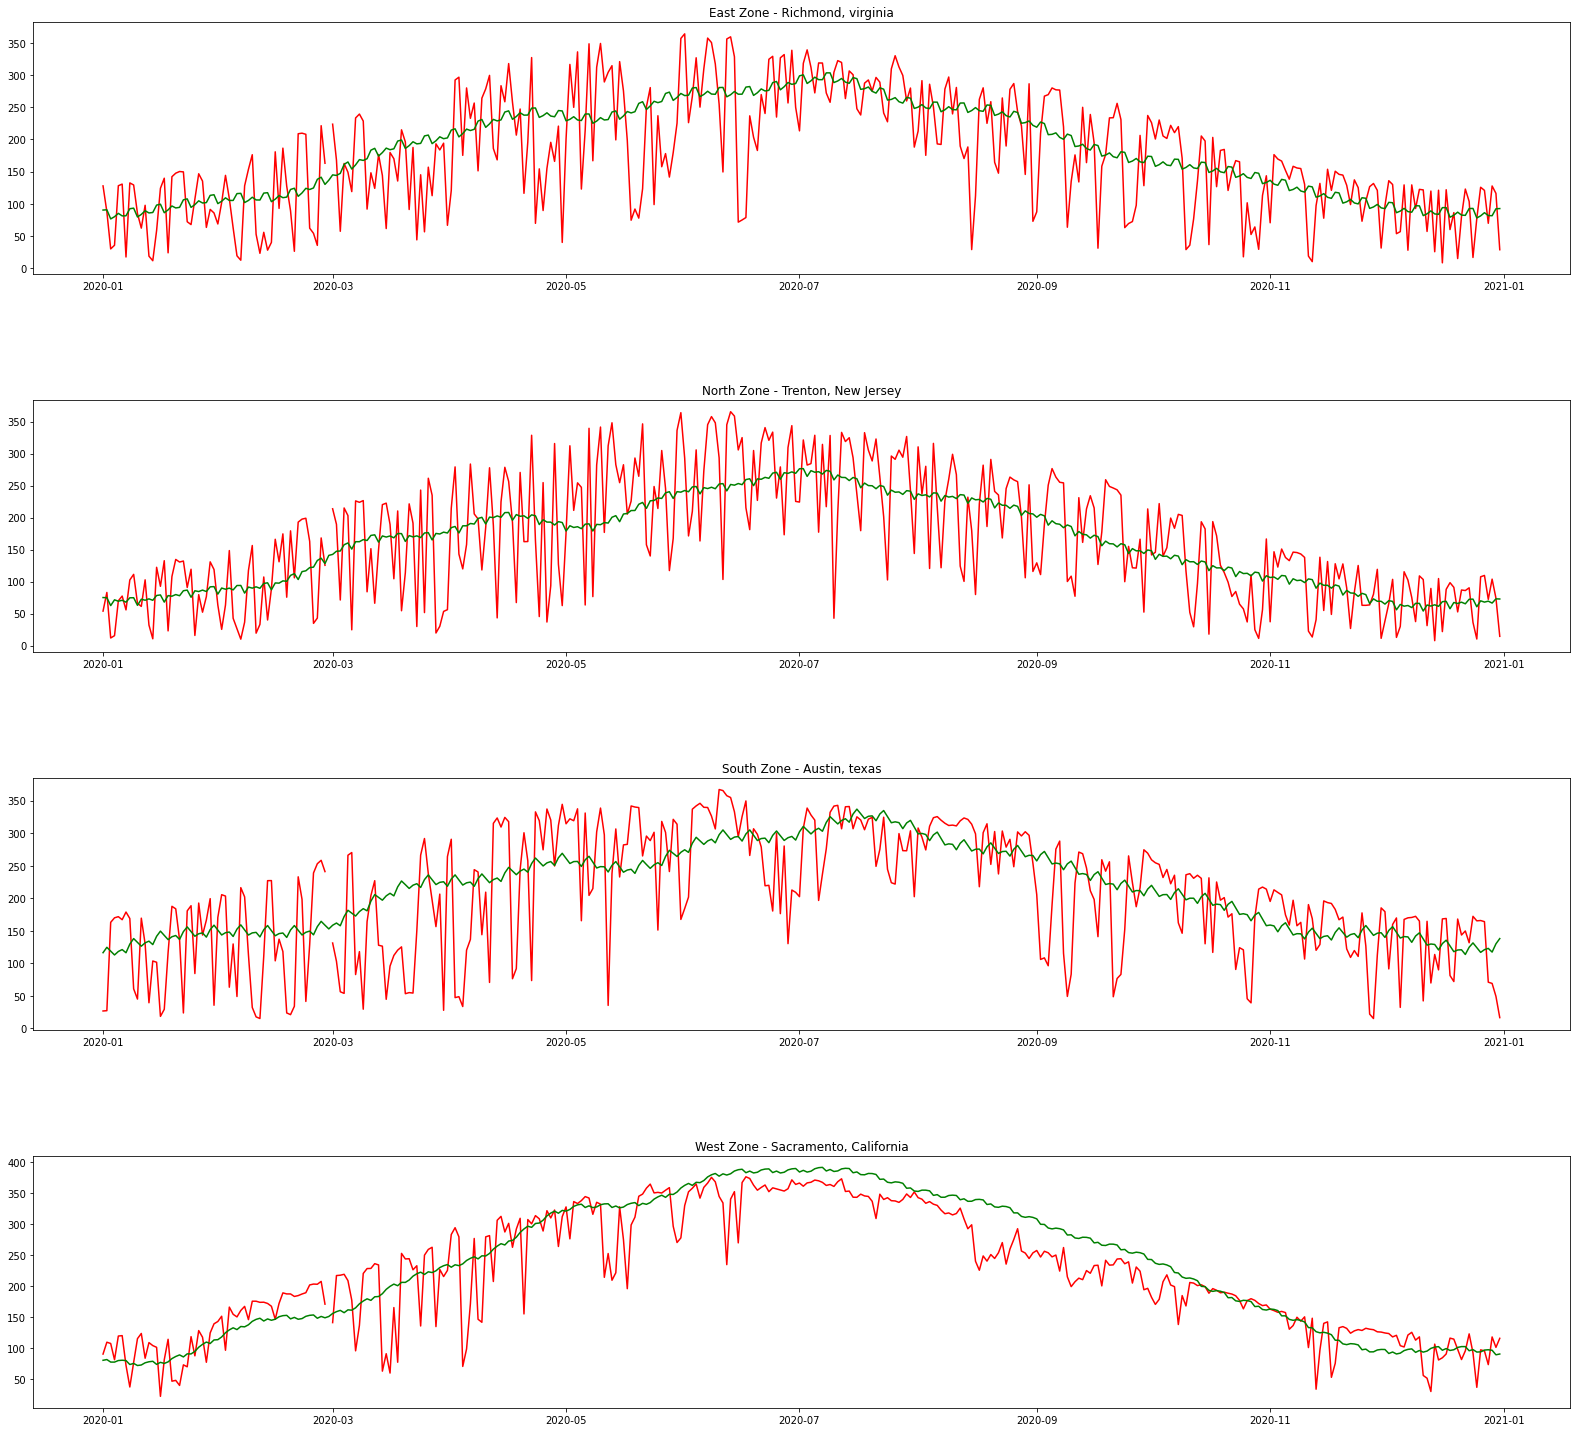

In [28]:
write_csv = 'E:/DS-670 Capstone Project/Capstone/Output result/'
f, axes = plt.subplots(4, 1, figsize=(22,20))
for i, csv_file in enumerate(csv_files):
    region = csv_file.split("\\")[4].split(".")[0].split("_")[0:3]
    region = region[0] + " Zone - " + region[2] +", " + region[1]
    data = pd.read_csv(csv_file)
    data['Date'] = pd.to_datetime(data[['Year','Month','Day']],format='%Y/%M/%D %H%m')
    data = data[['Date','GHI']]
    data = data.groupby(pd.Grouper(key='Date', axis=0, freq='D')).mean()
    data = data.reset_index()
    data=data.rename(columns={'Date':'ds','GHI':'y'})
    data.to_csv(write_csv+"Raw CSV File"+region+'.csv',index=False)
    end_date = '2019-12-31'
    mask1 = (data['ds'] <= end_date)
    mask2 = (data['ds'] > end_date)
    X_tr = data.loc[mask1]
    X_tst = data.loc[mask2]
    pd.plotting.register_matplotlib_converters()
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    model =Prophet(daily_seasonality=True)
    model.fit(X_tr)
    future = model.make_future_dataframe(periods=731, freq='D')
    forecast = model.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_forecast = model.predict(X_tst)
    X_tst_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    mape = mean_absolute_percentage_error(X_tst['y'],X_tst_forecast['yhat'])
    print("MAPE",round(mape,4))
    strt='2019-12-31'
    end='2020-02-26'
    model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
    for p in grid:
        test = pd.DataFrame()
        random.seed(0)
        train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                             n_changepoints = p['n_changepoints'],
                             seasonality_mode = p['seasonality_mode'],
                             weekly_seasonality=True,
                             daily_seasonality = True,
                             yearly_seasonality = True,
                             interval_width=0.95)
        train_model.fit(X_tr)
        train_forecast = train_model.make_future_dataframe(periods=57, freq='D',include_history = False)
        train_forecast = train_model.predict(train_forecast)
        test=train_forecast[['ds','yhat']]
        Actual = data[(data['ds']>strt) & (data['ds']<=end)]
        MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
        #print('Mean Absolute Percentage Error(MAPE)------------------------------------',MAPE)
        model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)
        parameters = model_parameters.sort_values(by=['MAPE'])
        parameters = parameters.reset_index(drop=True)
    parameters['Parameters'][0]
    dict_east = {'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
    dict_north = {'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
    dict_south = {'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
    dict_west = {'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
    if (parameters['Parameters'][0] == dict_east):
        final_model = Prophet(changepoint_prior_scale= 0.5, n_changepoints = 150, seasonality_mode = 'multiplicative', weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_north):
        final_model = Prophet(changepoint_prior_scale= 0.5,n_changepoints = 200, seasonality_mode = 'additive',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_south):
        final_model = Prophet(changepoint_prior_scale= 0.1,n_changepoints = 100,seasonality_mode = 'additive',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    elif (parameters['Parameters'][0] == dict_west):
        final_model = Prophet(changepoint_prior_scale= 0.4,n_changepoints = 200,seasonality_mode = 'multiplicative',weekly_seasonality=True,
                              daily_seasonality = True,yearly_seasonality = True,interval_width=0.95)
        final_model.fit(X_tr)
    else:
        print("False")
    future = final_model.make_future_dataframe(periods=731, freq='D')
    X_tst_final= final_model.predict(X_tst)
    X_tst_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)
    X_tst_final.to_csv(write_csv+'final Model on Test Data'+region+'.csv',index=False)
    ax = axes[i//1]
    ax.plot(X_tst['ds'], X_tst['y'], color='red', label='Test')
    ax.plot(X_tst_final['ds'],X_tst_final['yhat'], color='green',label='Forecast')
    ax.set_title(region)
fig.suptitle('Test Forecast vs Actuals final model')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.savefig('Test Forecast vs Actuals Final Model.png')
plt.show()
    